In [1]:
import numpy as np
import matplotlib.pyplot as plt
import boost_histogram as bh

from plothist.plotters import make_hist
from plothist.plotters import make_2d_hist
from plothist.plotters import plot_hist
from plothist.plotters import plot_2d_hist
from plothist.plotters import compare_two_hist
from plothist.generate_dummy_data import generate_dummy_data
from plothist.plotters import create_variable_registry
from plothist.plotters import get_variable_from_registry
from plothist.plotters import update_variable_registry_ranges

In [2]:
# Generate dummy data
df = generate_dummy_data()
df.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,category
0,3.161042,0.626421,-0.315482,-2.264888,-5.781431,-3.406428,1.759432,1.146277,3.047033,1.442019,2
1,-0.181271,-3.567424,2.257261,-0.449406,-4.044520,-0.892859,1.510282,1.462701,-2.730473,3.381304,4
2,-2.291207,-2.257079,-2.195531,-1.726600,-3.583056,-3.436460,-2.698386,1.111759,1.378220,-0.169138,6
3,2.080979,-1.865050,2.895760,-3.415163,-4.098792,3.783088,0.757920,-3.674254,2.831025,0.668761,2
4,-2.468859,-3.788331,2.821014,0.965556,-3.902289,-2.797187,2.484887,0.164317,-1.315192,1.629387,4


## I How to plot a single variable

Text(0, 0.5, 'Entries')

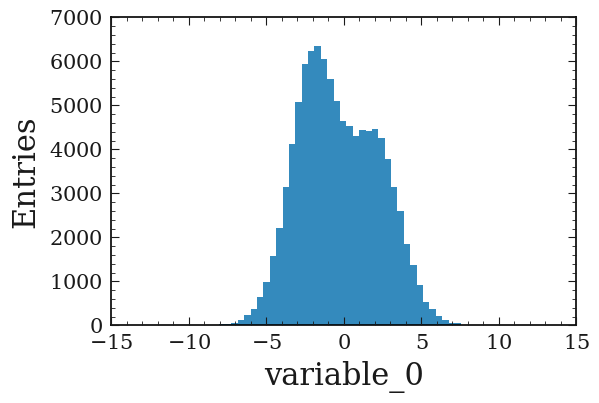

In [3]:
key = "variable_0"

fig, ax = plt.subplots()

h = make_hist(df[key])

plot_hist(h, ax=ax)

ax.set_xlabel(key)
ax.set_ylabel("Entries")

## II How to plot a set of variables using a variable registry

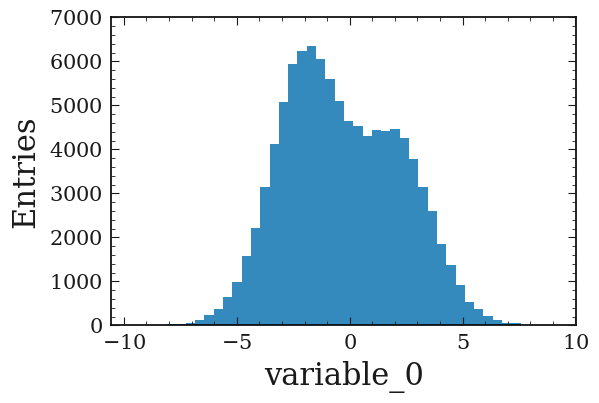

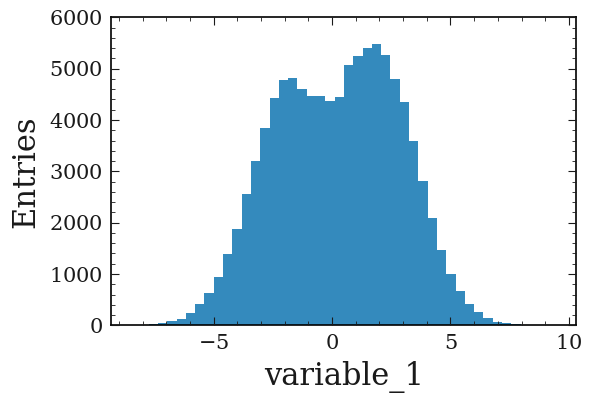

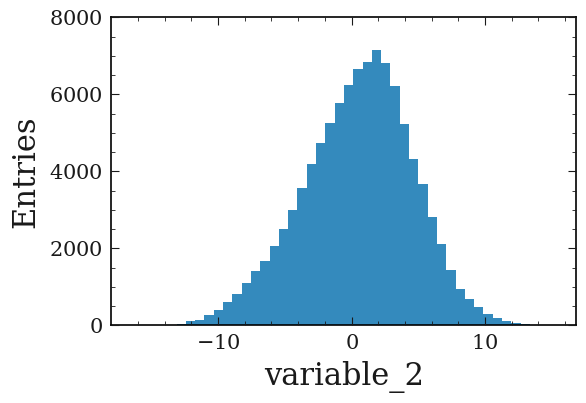

In [4]:
variable_keys = ["variable_0", "variable_1", "variable_2"]

# Create the yaml file containing all the plotting information
create_variable_registry(variable_keys)
# If no range specified for some variable_keys, update them with actual min and max value
update_variable_registry_ranges(df, variable_keys)

for variable_key in variable_keys:
    variable = get_variable_from_registry(variable_key)

    fig, ax = plt.subplots()
    h = make_hist(df[variable["name"]], bins=variable["bins"], range=variable["range"])
    plot_hist(h, ax=ax)
    ax.set_xlabel(variable["label"])

    ax.set_xlim(variable["range"])
    ax.set_ylabel("Entries")

# III Compare one variable between two datasets

(<Figure size 600x400 with 2 Axes>,
 <AxesSubplot: ylabel='Entries'>,
 <AxesSubplot: xlabel='variable_0', ylabel='$\\frac{c2}{c1}$'>)

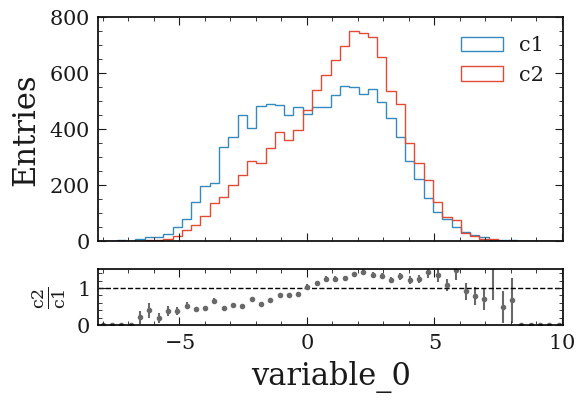

In [5]:
key = "variable_0"
category = "category"

x1 = df[key][df[category] == 1]
x2 = df[key][df[category] == 2]

x_range = [min([min(x) for x in [x1, x2]]), max([max(x) for x in [x1, x2]])]

h1 = make_hist(x1, bins=50, range=x_range, weights=1)
h2 = make_hist(x2, bins=50, range=x_range, weights=1)

compare_two_hist(
    h1, h2, xlabel=key, ylabel="Entries", x1_label="c1", x2_label="c2", save_as=None
)

# IV Compare a set of variable between two datasets using a registry

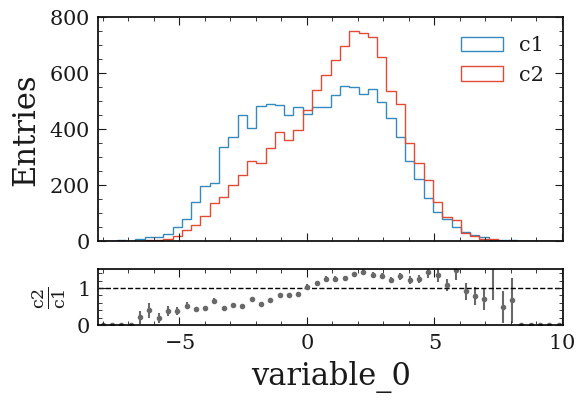

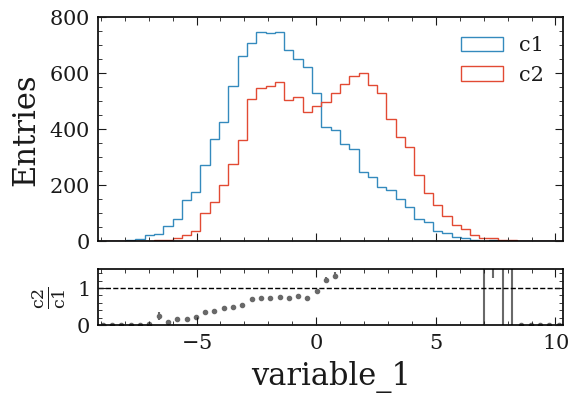

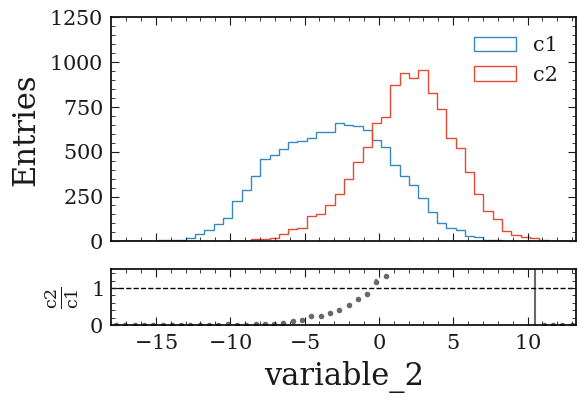

In [6]:
for variable_key in variable_keys:
    variable = get_variable_from_registry(variable_key)

    x1 = df[variable_key][df[category] == 1]
    x2 = df[variable_key][df[category] == 2]

    x_range = [min([min(x) for x in [x1, x2]]), max([max(x) for x in [x1, x2]])]

    h1 = make_hist(x1, bins=50, range=x_range, weights=1)
    h2 = make_hist(x2, bins=50, range=x_range, weights=1)

    compare_two_hist(
        h1,
        h2,
        xlabel=variable["label"],
        ylabel="Entries",
        x1_label="c1",
        x2_label="c2",
        save_as=None,
    )

# V How to plot a 2d histogram

Text(0, 0.5, 'variable_1')

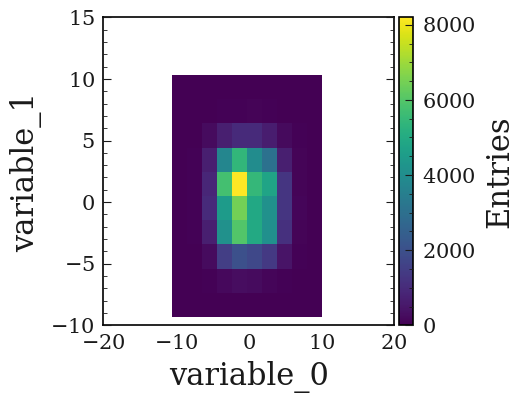

In [7]:
key_x = "variable_0"
key_y = "variable_1"

fig, ax = plt.subplots(figsize=(4,4))

h = make_2d_hist([df[key_x], df[key_y]])

plot_2d_hist(h, fig=fig, ax=ax, colorbar_kwargs={"label": "Entries"})

ax.set_xlabel(key_x)
ax.set_ylabel(key_y)

# Appendix A: Compare speed of numpy and boost-histogram

In [8]:
%%timeit
np.histogram(df["variable_0"], bins=10, range=(-5, 5))

2 ms ± 71.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%%timeit
h = bh.Histogram(bh.axis.Regular(10, -5, 5), storage=bh.storage.Double())
h.fill(df["variable_0"])

959 µs ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
